<a href="https://colab.research.google.com/github/FranciscaHM/Proyecto/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install amuse-framework

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.2/679.2 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached setuptools_scm-8.1.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools_scm-8.1.0-py3-none-any.whl (43 kB)
  Created wheel for amuse-framework: filename=amuse_framework-2024.6.0-py3-none-any.whl size=629886 sha256=465f3fc7ee6296decb0d231af299be6e0d84885a23fb206bf256c7fe0e1067f8
  Stored in directory: /root/.cache/pip/wheels/96/a7/96/08b4505f65a31c950a9ef03d5cf092aaa1b151d1bdd9b30503
Successfully built amuse-framework


In [2]:
import scipy as sp
import astropy as ap
import pandas as pd
import seaborn as cbrn
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from amuse.units import units
from amuse.io import read_set_from_file
from amuse.datamodel import Particles, particles
from amuse.lab import read_set_from_file

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Guardamos los datos en listas.

In [4]:
#Primero guardamos todos los path.
path_carpeta = '/content/drive/MyDrive/sim'
stars = []
gas = []
for i in range(1,91):
  stars.append(path_carpeta+f'/stars_{i}')
  gas.append(path_carpeta+f'/gas_{i}')

#Ahora los abrimos con read_set_from_file y los guardamos en una lista.
star_data = []
for elemento in stars:
  star_data.append(read_set_from_file(filename = elemento, format = 'hdf5'))

gas_data = []
for elemento in gas:
  gas_data.append(read_set_from_file(filename = elemento, format = 'hdf5'))

Conozcamos los atributos.

In [5]:
star_data[0].all_attributes()

['key',
 'mass',
 'potential_in_code',
 'radius',
 'timestep',
 'vx',
 'vy',
 'vz',
 'x',
 'y',
 'z',
 'virial_radius',
 'binaries',
 'center_of_mass',
 'total_angular_momentum',
 'minimum_spanning_tree_length',
 'acceleration',
 'mass_segregation_from_nearest_neighbour',
 'potential_energy_in_field',
 'velocity',
 'correlation_dimension',
 'total_momentum',
 'kinetic_energy',
 'find_closest_particle_to',
 'get_binaries',
 'total_radius',
 'new_particle_from_cluster_core',
 'add_spin',
 'specific_kinetic_energy',
 'potential_energy',
 'rotate',
 'box_counting_dimension',
 'cluster_core',
 'densitycentre_coreradius_coredens',
 'center_of_mass_velocity',
 'distances_squared',
 'mass_segregation_ratio',
 'natal_kick_velocity',
 'move_to_center',
 'dynamical_timescale',
 'Qparameter',
 'moment_of_inertia',
 'nearest_neighbour',
 'oblateness',
 'mass_segregation_Gini_coefficient',
 'angular_momentum',
 'bound_subset',
 'connected_components',
 'LagrangianRadii',
 'total_mass',
 'thermal_ene

Calculamos el centro de masa!

In [6]:
def r6(particles, indice):
  x0 = particles[indice].x
  y0 = particles[indice].y
  z0 = particles[indice].z
  d = ((particles.x-x0)**2+(particles.y-y0)**2+(particles.z-z0)**2).sqrt()
  return np.sort(d.value_in(units.parsec))[6]

CMs=[]
for j in range(0,len(star_data)):
  up = 0
  down = 0
  for i in range(0,len(star_data[j])):
    r6i = r6(star_data[j],i)
    up += (star_data[j][i].x.value_in(units.parsec), star_data[j][i].y.value_in(units.parsec), star_data[j][i].z.value_in(units.parsec))/r6i**3
    down += 1/r6i**3
  r = up/down
  CMs.append(r)

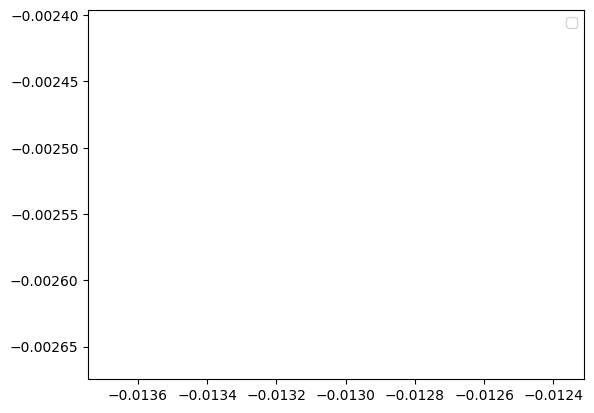

In [66]:
#Veamos si funciona:
xs1= star_data[0].x.value_in(units.parsec)
ys1= star_data[0].y.value_in(units.parsec)
zs1= star_data[0].z.value_in(units.parsec)

xg1= gas_data[0].x.value_in(units.parsec)
yg1= gas_data[0].y.value_in(units.parsec)
zg1= gas_data[0].z.value_in(units.parsec)

centerMs1 = star_data[0].center_of_mass().value_in(units.parsec)
centerMg1 = gas_data[0].center_of_mass().value_in(units.parsec)

#Centro de masa de amuse
mg1 = gas_data[0].mass.value_in(units.MSun)
mTotg1 = gas_data[0].total_mass().value_in(units.MSun)
centerMg1 = gas_data[0].center_of_mass().value_in(units.parsec)
segRatMs1 = star_data[0].mass_segregation_ratio()


#plt.plot(xs1,ys1, '.', color='skyblue')
#plt.plot(centerMs1[0],segRatMs1, color='blue')
#plt.plot(centerMs1[0],centerMs1[1], color='red')
plt.plot(CMs[0][0],CMs[0][1])#, color='green')
plt.legend()
plt.show()

In [62]:
CMs[0][1]

-0.0025352557673539514

Ahora veamos los potenciales

In [29]:
from amuse.datamodel import Particles, particles
from amuse.lab import read_set_from_file
Ep_gas_lista = []
Ep_stars_lista = []
for i in range(0,len(gas_data)):
  gas = gas_data[i]
  stars = star_data[i]
  all = particles.ParticlesSuperset([gas, stars])
  key_gas = all.get_intersecting_subset_in(gas).key
  mask_gas = all.get_indices_of_keys(key_gas)

  key_stars = all.get_intersecting_subset_in(stars).key
  mask_stars = all.get_indices_of_keys(key_stars)
  Ep = (all.potential()*all.mass/2)
  Ep_gas = Ep[mask_gas].sum().value_in(units.erg)
  Ep_stars = Ep[mask_stars].sum().value_in(units.erg)
  Ep_gas_lista.append(Ep_gas)
  Ep_stars_lista.append(Ep_stars)



In [30]:
Ep_gas_lista[22]

-1.203075842183649e+51

In [32]:
Ec_gas_lista = []
Ec_stars_lista = []
for i in range(0,len(gas_data)):
  gas = gas_data[i]
  stars = star_data[i]
  k_g = (gas.kinetic_energy() + gas.thermal_energy()).value_in(units.erg)
  k_s = stars.kinetic_energy().value_in(units.erg)
  Ec_gas_lista.append(k_g)
  Ec_stars_lista.append(k_s)

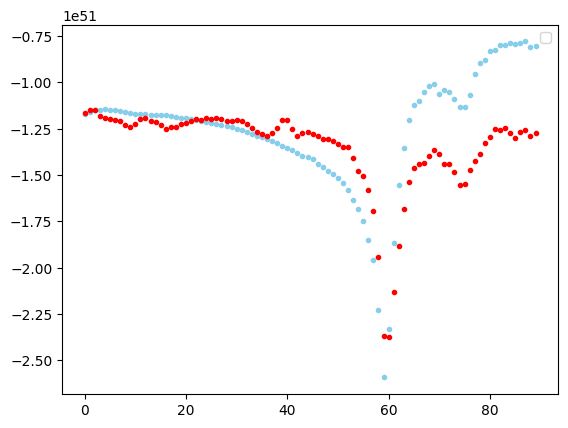

In [45]:
plt.plot(range(90),Ep_gas_lista,".", color='skyblue')
plt.plot(range(90),Ep_stars_lista,".", color='red')
plt.legend()
plt.show()

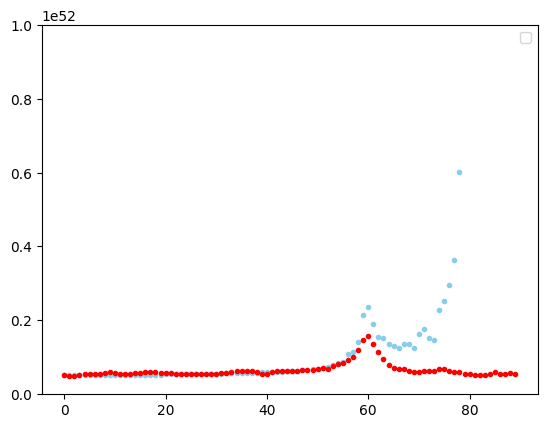

In [52]:
plt.plot(range(90),Ec_gas_lista,".", color='skyblue')
plt.plot(range(90),Ec_stars_lista,".", color='red')
plt.ylim(0,1e52)
plt.legend()
plt.show()

Estudiamos la pérdida de masa

In [50]:
radioVirial = all.virial_radius().as_quantity_in(units.pc)
print(radioVirial)

0.2060815913 parsec


In [ ]:
plt.plot(xs1,ys1, '.', color='skyblue')
plt.plot(centerMs1[0],segRatMs1, color='blue')
plt.plot(xg1,yg1, '.', color='yellow')
plt.plot([centerMs1[0],centerMg1[0]],[centerMs1[1],centerMg1[1]], color='red')
plt.legend()
plt.show()

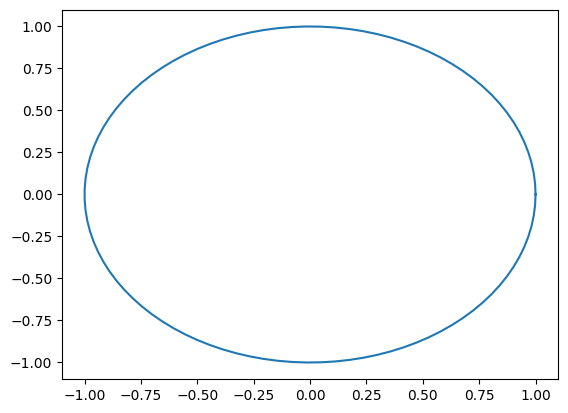

In [56]:
a = np.linspace(0,np.pi*2,100)
x = np.cos(a)
y = np.sin(a)
plt.plot(x,y)
plt.show()
#